In [1]:
# -------------------------------------------------
# Initially Import.
# -------------------------------------------------

import numpy as np
import matplotlib,pylab as plt
import tensorflow as tf
import keras
from scipy.io import loadmat 

from keras.layers import Input, Dense, Activation, Embedding, LSTM, Flatten

from keras.models import Model, Sequential
from keras.utils import np_utils

/home/mlvm2/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = loadmat('detop_exp01_subj22_Sess1_003.mat')

In [3]:
labels = dataset['glove'][0]
signals = dataset['emg'][0:125]
signals.shape

(125, 105561)

In [4]:
cut_num = len(signals[0])%40
cut_signals = np.delete(signals, 105560, axis = 1)
signal_process1 = np.zeros(shape = [cut_signals.shape[0], int(cut_signals.shape[1] / 10)])
for channels in range(0, cut_signals.shape[0]):
    process1 = np.zeros(int(cut_signals.shape[1] / 10))
    for i in range(0, int(cut_signals.shape[1])/ 10):
        for j in range(0, 10):
            process1[i] = process1[i] + abs(cut_signals[channels, 10 * i + j])
        process1[i] = process1[i] / 10
    for i in range(0, int(cut_signals.shape[1] / 10)):
        signal_process1[channels][i] = process1[i]
signal_process1.shape

(125, 10556)

In [5]:
signal_process2 = np.zeros(shape = [125, 10556/4, 4])
for channel in range(0,125):
    for i in range(0, 10556/4):
        for j in range(0,4):
            signal_process2[channel, i, j] = signal_process1[channel, i*4+j]
signal_process2.shape           

(125, 2639, 4)

In [6]:
signal_process2

array([[[ 1.20921202,  1.15481627,  2.46420519,  1.65032517],
        [ 3.07847293,  1.49823452,  2.76395455,  0.78604123],
        [ 0.71887477,  1.10290559,  1.57797127,  1.08149899],
        ...,
        [ 1.03265313,  1.15280762,  2.37538451,  1.94509994],
        [ 1.59060249,  2.5618382 ,  0.84205828,  1.72905756],
        [ 1.08292333,  1.21167646,  2.48673645,  4.42009887]],

       [[ 0.66967047,  1.17740866,  3.11660575,  1.41147964],
        [ 2.13576875,  1.41450439,  2.43000725,  1.24950731],
        [ 0.85467569,  1.24127104,  1.32290949,  0.47798139],
        ...,
        [ 1.31793093,  2.40718201,  2.60364704,  1.93665233],
        [ 1.91706916,  3.08132798,  0.86325966,  1.33942586],
        [ 0.82682961,  1.11562414,  3.46732081,  5.01768108]],

       [[ 1.34295894,  1.75569876,  1.53594696,  2.0267392 ],
        [ 2.92254957,  1.10506055,  1.97370492,  1.06025859],
        [ 1.10997919,  0.81220535,  1.05415739,  1.20404779],
        ...,
        [ 1.44242784,  2.06

In [7]:
signal_input  = signal_process2.copy()
signal_input_final = np.zeros(shape = [2639, 125, 4])
for i in range(0, 2639):
    for j in range(0, 125):
        for k in range(0, 4):
            signal_input_final[i,j,k] = signal_input[j,i,k]

In [8]:
signal_input_final

array([[[ 1.20921202,  1.15481627,  2.46420519,  1.65032517],
        [ 0.66967047,  1.17740866,  3.11660575,  1.41147964],
        [ 1.34295894,  1.75569876,  1.53594696,  2.0267392 ],
        ...,
        [ 0.67232383,  1.82814133,  3.7391714 ,  0.60717308],
        [ 1.48035217,  1.55159099,  3.6111266 ,  1.20103717],
        [ 1.19233316,  1.86975962,  4.01149515,  1.55462078]],

       [[ 3.07847293,  1.49823452,  2.76395455,  0.78604123],
        [ 2.13576875,  1.41450439,  2.43000725,  1.24950731],
        [ 2.92254957,  1.10506055,  1.97370492,  1.06025859],
        ...,
        [ 0.83238005,  3.16265837,  1.55735068,  1.33893454],
        [ 1.19278371,  2.66184743,  1.86991447,  1.36268282],
        [ 1.67914073,  1.89595555,  1.45350224,  1.21731471]],

       [[ 0.71887477,  1.10290559,  1.57797127,  1.08149899],
        [ 0.85467569,  1.24127104,  1.32290949,  0.47798139],
        [ 1.10997919,  0.81220535,  1.05415739,  1.20404779],
        ...,
        [ 1.64474789,  1.05

In [17]:
cut_labels = np.delete(labels, [len(labels) - cut_num, len(labels)])

labels_process1 = np.zeros(int(len(cut_labels)/240))

for i in range(int(len(cut_labels)/240)):
    labels_process1[i] = labels[i*240]

labels_process2 = labels_process1.copy()
signal_process3 = signal_input_final.copy()
#cal = 0

#for i in range(0, 2639):
#    if labels_process1[i] > 1 or labels_process1[i] < 0.1:
#        labels_process2 = np.delete(labels_process2, i-cal, axis = 0)
#        signal_process3 = np.delete(signal_process3, i-cal, axis = 0)
#        cal = cal + 1

/home/mlvm2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.


In [18]:
signal_process3.shape

(2639, 125, 4)

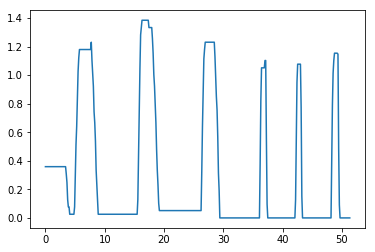

In [21]:
time = np.zeros(439)

for i in range(0, 439):
    time[i] = float(i)/2048*240
    
plt.plot(time, labels_process2)
plt.show()

In [22]:
t_s_x = signal_process3
t_s_angles = labels_process2

In [23]:
t_s_x = np.delete(t_s_x, [2634, 2635, 2636, 2637, 2638], axis = 0)

In [36]:
t_s_x.shape

(439, 6, 125, 4)

In [62]:
t_s_x = t_s_x.reshape(439, 6, 125*4)

In [63]:
t_s_x.shape

(439, 6, 500)

In [64]:
#permutation = np.random.permutation(t_s_angles.shape[0])
#shuffled_t_s_x = t_s_x[permutation, :]
#shuffled_t_s_angles = t_s_angles[permutation]
train_t_s_x = t_s_x[0:400]
train_t_s_angles = t_s_angles[0:400]
test_t_s_x = t_s_x[400:]
test_t_s_angles = t_s_angles[400:]

In [69]:
# --------------------------------------------------------
# keras model.
# --------------------------------------------------------

tsrnnmodel = Sequential()
tsrnnmodel.add(Dense(6, activation = 'relu', input_shape = [6, 500]))
tsrnnmodel.add(LSTM(6, kernel_regularizer = keras.regularizers.l2(0.02)))
tsrnnmodel.add(Dense(6, activation = 'relu'))
tsrnnmodel.add(Dense(1))
tsrnnmodel.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [70]:
tsrnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 6, 6)              3006      
_________________________________________________________________
lstm_15 (LSTM)               (None, 6)                 312       
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 7         
Total params: 3,367
Trainable params: 3,367
Non-trainable params: 0
_________________________________________________________________


In [71]:
tsrnnmodel.fit(train_t_s_x, train_t_s_angles, epochs = 40, batch_size = 10, verbose = 2)

Epoch 1/40
 - 1s - loss: 0.3714
Epoch 2/40
 - 0s - loss: 0.3268
Epoch 3/40
 - 0s - loss: 0.2918
Epoch 4/40
 - 0s - loss: 0.2681
Epoch 5/40
 - 0s - loss: 0.2515
Epoch 6/40
 - 0s - loss: 0.2340
Epoch 7/40
 - 0s - loss: 0.2205
Epoch 8/40
 - 0s - loss: 0.2280
Epoch 9/40
 - 1s - loss: 0.2022
Epoch 10/40
 - 1s - loss: 0.1906
Epoch 11/40
 - 0s - loss: 0.1836
Epoch 12/40
 - 0s - loss: 0.1746
Epoch 13/40
 - 0s - loss: 0.1678
Epoch 14/40
 - 0s - loss: 0.1746
Epoch 15/40
 - 0s - loss: 0.1741
Epoch 16/40
 - 0s - loss: 0.1598
Epoch 17/40
 - 0s - loss: 0.1629
Epoch 18/40
 - 0s - loss: 0.1593
Epoch 19/40
 - 1s - loss: 0.1663
Epoch 20/40
 - 1s - loss: 0.1419
Epoch 21/40
 - 1s - loss: 0.1364
Epoch 22/40
 - 0s - loss: 0.1407
Epoch 23/40
 - 1s - loss: 0.1293
Epoch 24/40
 - 0s - loss: 0.1341
Epoch 25/40
 - 0s - loss: 0.1436
Epoch 26/40
 - 0s - loss: 0.1277
Epoch 27/40
 - 1s - loss: 0.1236
Epoch 28/40
 - 1s - loss: 0.1343
Epoch 29/40
 - 0s - loss: 0.1361
Epoch 30/40
 - 1s - loss: 0.1381
Epoch 31/40
 - 1s -

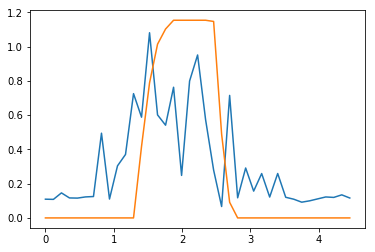

In [72]:
# ------------------------------------------------------
# Produce result.
# The result is bad but not too bad.
# At least it has a good 'trend' (although sonewhere it does definitely wrong prediction.) 
# THINK about the problem of (up-trend angle and down-trend angle)?
# ------------------------------------------------------
test_prediction = tsrnnmodel.predict(test_t_s_x)
test_prediction = test_prediction.reshape(39)
time_test = np.zeros(39)

for i in range(0, 39):
    time_test[i] = float(i)/2048*240

time_test = time_test[0:39]
test_prediction = test_prediction[0:39]

plt.plot(time_test, test_prediction, time_test, test_t_s_angles[0:39])
plt.show()